In [1]:
!apt install tesseract-ocr -y
!pip install pytesseract opencv-python-headless imutils matplotlib

import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
import imutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [3]:
!wget -O sample_text.jpg "https://i.imgur.com/3cQRm1b.png"

image = cv2.imread("sample_text.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

--2025-09-09 18:35:19--  https://i.imgur.com/3cQRm1b.png
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 429 Unknown Error
2025-09-09 18:35:19 ERROR 429: Unknown Error.



error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Saving picdl.jpg to picdl.jpg


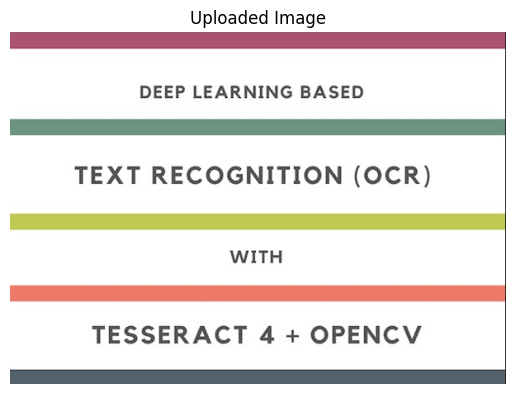

In [4]:
from google.colab import files
uploaded = files.upload()

# Read uploaded image
image = cv2.imread(list(uploaded.keys())[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Uploaded Image")
plt.axis("off")
plt.show()


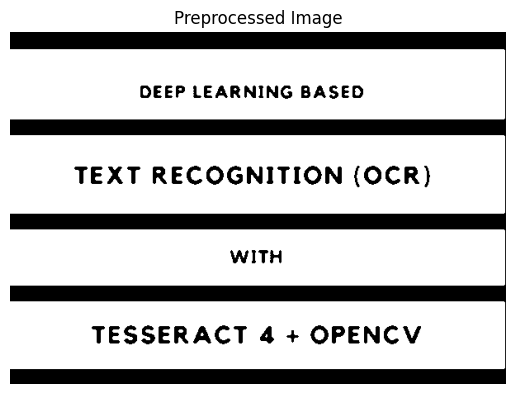

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Denoise and threshold
gray = cv2.medianBlur(gray, 3)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap="gray")
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()


In [6]:
import pytesseract

# Configure Tesseract
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(thresh, config=custom_config)

print("📜 Extracted Text:\n")
print(extracted_text)


📜 Extracted Text:

DEEP LEARNING BASED
TEXT RECOGNITION (OCR)
WITH
TESSERACT 4 + OPENCV

